# source link : https://datamillnorth.org/dataset/customer-meter-data

# local area study dataset link :
# https://datamillnorth.org/dataset/yorkshire-water-daily-customer-meter-data--local-area-
# https://datamillnorth.org/download/yorkshire-water-daily-customer-meter-data--local-area-/fb01ce66-423a-4111-9065-d989bdf0b3ce/Daily%20m3%201315.csv

In [50]:
import wandb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
url = "https://datamillnorth.org/download/customer-meter-data/b9f2cc02-3fe2-42ae-8470-b2e5d96af712/201415%20YW%20Customer%20Meter%20Data.csv"
df = pd.read_csv(url)


GROSS_COMSUMPTION - (READING_END_READING)-(READING_START_READING).  One unit = 1m3 (1000 litres)

In [51]:
df.head()

,POSTAL_TOWN,POSTCODE_OUTCODE,PROPERTY_CLASS,METER_KEY,READING_START_DATE,READING_END_DATE,READING_START_READING,READING_END_READING,GROSS_CONSUMPTION,DAILY_AVERAGE_CONSUMPTION,READING_SOURCE,CUSTOMER_TYPE,BILLPAYER_AGE,CURRENT_OCCUPANCY_AGE
0,NaN,NaN,NaN,1012229,27/06/2014 00:00,08/09/2014 00:00,339.0,345.0,6,0.081,Actual Automated Meter Reading,,NaN,5.0
1,NaN,NaN,NaN,1012229,06/12/2014 00:00,09/03/2015 00:00,360.0,386.0,26,0.277,Actual Automated Meter Reading,,NaN,0.0
2,NaN,,All new Domestic Properties,755928,11/02/2014 00:00,29/04/2014 00:00,2678.0,2716.0,38,0.487,Actual Automated Meter Reading,,NaN,8.0
3,NaN,,All new Domestic Properties,755928,09/08/2014 00:00,10/11/2014 00:00,2768.0,2845.0,77,0.819,Actual Automated Meter Reading,,NaN,8.0
4,NaN,,House RV 100-124,882360,25/01/2014 00:00,24/04/2014 00:00,98.0,102.0,4,0.044,Actual Automated Meter Reading,,81+,7.0


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2485511 entries, 0 to 2485510
Data columns (total 14 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   POSTAL_TOWN                object 
 1   POSTCODE_OUTCODE           object 
 2   PROPERTY_CLASS             object 
 3   METER_KEY                  int64  
 4   READING_START_DATE         object 
 5   READING_END_DATE           object 
 6   READING_START_READING      float64
 7   READING_END_READING        float64
 8   GROSS_CONSUMPTION          int64  
 9   DAILY_AVERAGE_CONSUMPTION  float64
 10  READING_SOURCE             object 
 11  CUSTOMER_TYPE              object 
 12  BILLPAYER_AGE              object 
 13  CURRENT_OCCUPANCY_AGE      float64
dtypes: float64(4), int64(2), object(8)
memory usage: 265.5+ MB


# some cleaning

In [53]:
df.dropna()

,POSTAL_TOWN,POSTCODE_OUTCODE,PROPERTY_CLASS,METER_KEY,READING_START_DATE,READING_END_DATE,READING_START_READING,READING_END_READING,GROSS_CONSUMPTION,DAILY_AVERAGE_CONSUMPTION,READING_SOURCE,CUSTOMER_TYPE,BILLPAYER_AGE,CURRENT_OCCUPANCY_AGE
227,Barnoldswick,BB18,House RV 150-399,89828,11/05/2014 00:00,22/08/2014 00:00,6740.0,6770.0,30,0.288,Normal reading,,61-70,18.0
228,Barnoldswick,BB18,House RV 150-399,89828,20/11/2014 00:00,12/02/2015 00:00,6799.0,6838.0,39,0.459,Normal reading,,61-70,18.0
231,Barnoldswick,BB18,House RV 150-399,89836,11/05/2014 00:00,22/08/2014 00:00,6580.0,6591.0,11,0.106,Normal reading,,61-70,33.0
232,Barnoldswick,BB18,House RV 150-399,89836,20/11/2014 00:00,13/02/2015 00:00,6602.0,6620.0,18,0.209,Normal reading,,61-70,33.0
233,Barnoldswick,BB18,House RV 150-399,89850,11/05/2014 00:00,21/08/2014 00:00,77.0,99.0,22,0.214,Actual Automated Meter Reading,,81+,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2485491,Selby,YO8,House RV 76-99,1268406,30/03/2015 00:00,30/03/2015 00:00,0.0,0.0,0,0.000,Normal reading,,41-50,0.0
2485494,Selby,YO8,House RV 100-124,1268504,31/03/2015 00:00,31/03/2015 00:00,0.0,0.0,0,0.000,Normal reading,,51-60,0.0
2485495,Selby,YO8,House RV 125-149,1268725,31/03/2015 00:00,31/03/2015 00:00,0.0,0.0,0,0.000,Normal reading,,31-40,0.0
2485499,Selby,YO8,All new Domestic Properties,1270351,27/03/2015 00:00,27/03/2015 00:00,0.0,0.0,0,0.000,Normal reading,,16-30,0.0


In [54]:
df = df.drop_duplicates(keep='first')
df

,POSTAL_TOWN,POSTCODE_OUTCODE,PROPERTY_CLASS,METER_KEY,READING_START_DATE,READING_END_DATE,READING_START_READING,READING_END_READING,GROSS_CONSUMPTION,DAILY_AVERAGE_CONSUMPTION,READING_SOURCE,CUSTOMER_TYPE,BILLPAYER_AGE,CURRENT_OCCUPANCY_AGE
0,NaN,NaN,NaN,1012229,27/06/2014 00:00,08/09/2014 00:00,339.0,345.0,6,0.081,Actual Automated Meter Reading,,NaN,5.0
1,NaN,NaN,NaN,1012229,06/12/2014 00:00,09/03/2015 00:00,360.0,386.0,26,0.277,Actual Automated Meter Reading,,NaN,0.0
2,NaN,,All new Domestic Properties,755928,11/02/2014 00:00,29/04/2014 00:00,2678.0,2716.0,38,0.487,Actual Automated Meter Reading,,NaN,8.0
3,NaN,,All new Domestic Properties,755928,09/08/2014 00:00,10/11/2014 00:00,2768.0,2845.0,77,0.819,Actual Automated Meter Reading,,NaN,8.0
4,NaN,,House RV 100-124,882360,25/01/2014 00:00,24/04/2014 00:00,98.0,102.0,4,0.044,Actual Automated Meter Reading,,81+,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2485506,NaN,YO89,All new Domestic Properties,1260079,29/01/2015 00:00,29/01/2015 00:00,0.0,0.0,0,0.000,Normal reading,,NaN,0.0
2485507,NaN,YO89,All new Domestic Properties,1260079,29/01/2015 00:00,10/03/2015 00:00,0.0,0.0,0,0.000,Normal reading,,NaN,0.0
2485508,NaN,YO89,All new Domestic Properties,1260079,10/03/2015 00:00,25/03/2015 00:00,0.0,1.0,1,0.063,Actual Automated Meter Reading,,NaN,0.0
2485509,NaN,YO9,All new Domestic Properties,388182,24/01/2014 00:00,10/04/2014 00:00,582.0,609.0,27,0.351,Actual Automated Meter Reading,,31-40,7.0


# deeper data understanding

In [55]:
df['READING_SOURCE'].unique()

array(['Actual Automated Meter Reading', 'Reading confirmed as correct',
       'Normal reading', "Customer's own reading",
       'Zero consumption on live meter (not damaged)',
       'Reading high consumption customer informed',
       'Reading high consumption customer not informed',
       'Reading customer has left', 'Radio unit fitted',
       'Reading low consumption customer not informed',
       'Reading low consumption customer informed'], dtype=object)

In [56]:
df=df.dropna(subset=["POSTAL_TOWN"])
df['POSTAL_TOWN'].unique()

array(['Barnoldswick', 'Bradford', 'Bingley', 'Shipley', 'Cleckheaton',
       'Keighley', 'Skipton', 'Settle', 'Richmond', 'Darlington',
       'Northallerton', 'Bedale', 'Catterick Garrison', 'Doncaster',
       'Goole', 'Scunthorpe', 'Huddersfield', 'Harrogate', 'Ripon',
       'Knaresborough', 'Hull', 'Hessle', 'North Ferriby', 'Brough',
       'Cottingham', 'Beverley', 'Hornsea', 'Withernsea', 'Halifax',
       'Elland', 'Sowerby Bridge', 'Hebden Bridge', 'Lancaster',
       'Carnforth', 'Leeds', 'Otley', 'Wetherby', 'Tadcaster', 'Pudsey',
       'Ilkley', 'Todmorden', 'Sheffield', 'Rotherham', 'Mexborough',
       'Barnsley', 'Worksop', 'Saltburn-By-The-Sea', 'Wakefield',
       'Castleford', 'Knottingley', 'Dewsbury', 'Mirfield', 'Liversedge',
       'Heckmondwike', 'Batley', 'Ossett', 'Normanton', 'Pontefract',
       'York', 'Scarborough', 'Filey', 'Bridlington', 'Malton',
       'Pickering', 'Whitby', 'Driffield', 'Thirsk', 'Selby'],
      dtype=object)

In [57]:
df['PROPERTY_CLASS'].unique()

array(['House RV 150-399', 'All new Domestic Properties',
       'House RV 100-124', 'House RV 125-149', 'House RV 76-99',
       'House RV <75', 'House RV >400'], dtype=object)

In [58]:
df['BILLPAYER_AGE'].unique()

array(['61-70', nan, '81+', '16-30', '51-60', '41-50', '31-40', '71-80'],
      dtype=object)

In [59]:
df['CUSTOMER_TYPE'].unique()

array([' ', 'A', 'I', nan], dtype=object)

In [60]:
# df[df["CUSTOMER_TYPE"]==" "] = "I/A"
df['CUSTOMER_TYPE'].unique()

array([' ', 'A', 'I', nan], dtype=object)

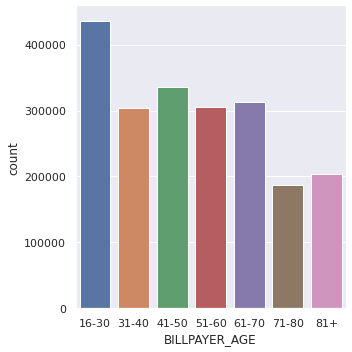

In [61]:
sns.catplot( x="BILLPAYER_AGE", kind="count", data=df.sort_values(by=['BILLPAYER_AGE']))


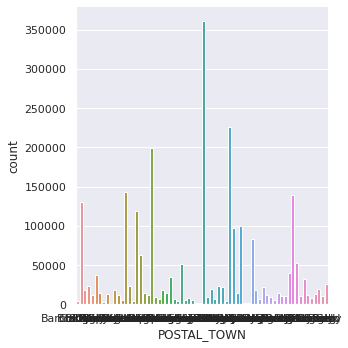

In [62]:
sns.set(rc={'figure.figsize':(20,8.27)})
sns.catplot( x="POSTAL_TOWN", kind="count", data=df)

# Towns on the map

In [63]:
from geopy.geocoders import Nominatim, GoogleV3


In [64]:

df2 = df.groupby(['POSTAL_TOWN'])["GROSS_CONSUMPTION"].mean().reset_index(name="total average gross consumption")
df2

,POSTAL_TOWN,total average gross consumption
0,Barnoldswick,18.732007
1,Barnsley,16.915519
2,Batley,20.728475
3,Bedale,18.104039
4,Beverley,18.826027
...,...,...
63,Wetherby,20.623030
64,Whitby,16.042869
65,Withernsea,16.590594
66,Worksop,26.557538


In [65]:
geolocator = Nominatim(user_agent="example")
L1=[] #lat
L2=[] #lon
L3=[] #name
for i in range (len(df2)) :
    data = geolocator.geocode(df2['POSTAL_TOWN'].loc[df2.index[i]])
    data.raw.get("lat"), data.raw.get("lon")
    L1.append(data.raw.get("lat"))
    L2.append(data.raw.get("lon"))
    L3.append(df2['POSTAL_TOWN'].loc[df2.index[i]])

In [66]:
# import the library
import folium
# Make an empty map
m = folium.Map(location=[20,0], tiles="OpenStreetMap", zoom_start=2)
# Show the map
m
# Make a data frame with dots to show on the map
data = pd.DataFrame({
   'lon':L2,
   'lat':L1,
   'name':L3,
   'value':df2['total average gross consumption']
}, dtype=str)


In [67]:
# add marker one by one on the map
for i in range(len(df2)):
   folium.Marker(
      location=[data.iloc[i]['lat'], data.iloc[i]['lon']],
      popup=data.iloc[i]['value'],
   ).add_to(m)
m
# Show the map again

some city seem to have the same name as some cities in the us and canada.

# some encoding

In [68]:
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,POSTAL_TOWN,POSTCODE_OUTCODE,PROPERTY_CLASS,READING_START_DATE,READING_END_DATE,READING_SOURCE,CUSTOMER_TYPE,BILLPAYER_AGE
227,Barnoldswick,BB18,House RV 150-399,11/05/2014 00:00,22/08/2014 00:00,Normal reading,,61-70
228,Barnoldswick,BB18,House RV 150-399,20/11/2014 00:00,12/02/2015 00:00,Normal reading,,61-70
229,Barnoldswick,BB18,House RV 150-399,11/05/2014 00:00,22/08/2014 00:00,Actual Automated Meter Reading,,NaN
230,Barnoldswick,BB18,House RV 150-399,20/11/2014 00:00,13/02/2015 00:00,Actual Automated Meter Reading,,NaN
231,Barnoldswick,BB18,House RV 150-399,11/05/2014 00:00,22/08/2014 00:00,Normal reading,,61-70


In [69]:
obj_df[obj_df.isnull().any(axis=1)]


,POSTAL_TOWN,POSTCODE_OUTCODE,PROPERTY_CLASS,READING_START_DATE,READING_END_DATE,READING_SOURCE,CUSTOMER_TYPE,BILLPAYER_AGE
229,Barnoldswick,BB18,House RV 150-399,11/05/2014 00:00,22/08/2014 00:00,Actual Automated Meter Reading,,NaN
230,Barnoldswick,BB18,House RV 150-399,20/11/2014 00:00,13/02/2015 00:00,Actual Automated Meter Reading,,NaN
240,Barnoldswick,BB18,House RV 150-399,28/02/2014 00:00,29/04/2014 00:00,Actual Automated Meter Reading,,NaN
241,Barnoldswick,BB18,House RV 150-399,29/04/2014 00:00,31/08/2014 00:00,Actual Automated Meter Reading,,NaN
242,Barnoldswick,BB18,House RV 150-399,31/08/2014 00:00,17/11/2014 00:00,Actual Automated Meter Reading,,NaN
...,...,...,...,...,...,...,...,...
2485497,Selby,YO8,All new Domestic Properties,27/03/2015 00:00,27/03/2015 00:00,Normal reading,,NaN
2485498,Selby,YO8,All new Domestic Properties,24/03/2015 00:00,24/03/2015 00:00,Normal reading,,NaN
2485500,Selby,YO8,All new Domestic Properties,27/03/2015 00:00,27/03/2015 00:00,Normal reading,,NaN
2485502,Selby,YO8,All new Domestic Properties,24/03/2015 00:00,24/03/2015 00:00,Normal reading,,NaN


fill nan values with the most frequent value

In [70]:
#obj_df["POSTAL_TOWN"].value_counts()
obj_df = obj_df.fillna({"POSTAL_TOWN": "Leeds"})
obj_df = obj_df.fillna({"BILLPAYER_AGE": "16-30"})
obj_df = obj_df.fillna({"PROPERTY_CLASS": "All new Domestic Properties"})
obj_df = obj_df.fillna({"CUSTOMER_TYPE": "I/A"})



In [71]:
obj_df.drop(columns=['POSTCODE_OUTCODE'])


,POSTAL_TOWN,PROPERTY_CLASS,READING_START_DATE,READING_END_DATE,READING_SOURCE,CUSTOMER_TYPE,BILLPAYER_AGE
227,Barnoldswick,House RV 150-399,11/05/2014 00:00,22/08/2014 00:00,Normal reading,,61-70
228,Barnoldswick,House RV 150-399,20/11/2014 00:00,12/02/2015 00:00,Normal reading,,61-70
229,Barnoldswick,House RV 150-399,11/05/2014 00:00,22/08/2014 00:00,Actual Automated Meter Reading,,16-30
230,Barnoldswick,House RV 150-399,20/11/2014 00:00,13/02/2015 00:00,Actual Automated Meter Reading,,16-30
231,Barnoldswick,House RV 150-399,11/05/2014 00:00,22/08/2014 00:00,Normal reading,,61-70
...,...,...,...,...,...,...,...
2485499,Selby,All new Domestic Properties,27/03/2015 00:00,27/03/2015 00:00,Normal reading,,16-30
2485500,Selby,All new Domestic Properties,27/03/2015 00:00,27/03/2015 00:00,Normal reading,,16-30
2485501,Selby,All new Domestic Properties,30/03/2015 00:00,30/03/2015 00:00,Normal reading,,51-60
2485502,Selby,All new Domestic Properties,24/03/2015 00:00,24/03/2015 00:00,Normal reading,,16-30


In [72]:
cleanup_nums = {"CUSTOMER_TYPE":     {" ": 0, "I": 1, "A":2, 'I/A':3 },
                "BILLPAYER_AGE": {"16-30": 25, "31-40": 35, "41-50":45, "51-60": 55,
                                  "61-70": 65, "71-80": 75,"81+": 85 },
                "PROPERTY_CLASS": {"All new Domestic Properties":1 , "House RV <75": 2, 
                                  "House RV 76-99":3, "House RV 100-124":4, "House RV 125-149":5, 
                                  "House RV 150-399":6, "House RV >400":7 },
                "READING_SOURCE": {"Actual Automated Meter Reading": 1,"Normal reading":2,
                                  "Customer's own reading": 3,"Reading confirmed as correct":4,
                                  "Reading high consumption customer not informed":5, "Reading customer has left":6,
                                  "Reading low consumption customer not informed":7,"Radio unit fitted":8, 
                                  "Reading low consumption customer informed":9}
               }

In [73]:
obj_df = obj_df.replace(cleanup_nums)
obj_df.head()

,POSTAL_TOWN,POSTCODE_OUTCODE,PROPERTY_CLASS,READING_START_DATE,READING_END_DATE,READING_SOURCE,CUSTOMER_TYPE,BILLPAYER_AGE
227,Barnoldswick,BB18,6,11/05/2014 00:00,22/08/2014 00:00,2,0,65
228,Barnoldswick,BB18,6,20/11/2014 00:00,12/02/2015 00:00,2,0,65
229,Barnoldswick,BB18,6,11/05/2014 00:00,22/08/2014 00:00,1,0,25
230,Barnoldswick,BB18,6,20/11/2014 00:00,13/02/2015 00:00,1,0,25
231,Barnoldswick,BB18,6,11/05/2014 00:00,22/08/2014 00:00,2,0,65


In [74]:
obj_df.head()


,POSTAL_TOWN,POSTCODE_OUTCODE,PROPERTY_CLASS,READING_START_DATE,READING_END_DATE,READING_SOURCE,CUSTOMER_TYPE,BILLPAYER_AGE
227,Barnoldswick,BB18,6,11/05/2014 00:00,22/08/2014 00:00,2,0,65
228,Barnoldswick,BB18,6,20/11/2014 00:00,12/02/2015 00:00,2,0,65
229,Barnoldswick,BB18,6,11/05/2014 00:00,22/08/2014 00:00,1,0,25
230,Barnoldswick,BB18,6,20/11/2014 00:00,13/02/2015 00:00,1,0,25
231,Barnoldswick,BB18,6,11/05/2014 00:00,22/08/2014 00:00,2,0,65


In [75]:
obj_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2477061 entries, 227 to 2485503
Data columns (total 8 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   POSTAL_TOWN         object
 1   POSTCODE_OUTCODE    object
 2   PROPERTY_CLASS      int64 
 3   READING_START_DATE  object
 4   READING_END_DATE    object
 5   READING_SOURCE      object
 6   CUSTOMER_TYPE       int64 
 7   BILLPAYER_AGE       int64 
dtypes: int64(3), object(5)
memory usage: 170.1+ MB


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2477061 entries, 227 to 2485503
Data columns (total 14 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   POSTAL_TOWN                object 
 1   POSTCODE_OUTCODE           object 
 2   PROPERTY_CLASS             object 
 3   METER_KEY                  int64  
 4   READING_START_DATE         object 
 5   READING_END_DATE           object 
 6   READING_START_READING      float64
 7   READING_END_READING        float64
 8   GROSS_CONSUMPTION          int64  
 9   DAILY_AVERAGE_CONSUMPTION  float64
 10  READING_SOURCE             object 
 11  CUSTOMER_TYPE              object 
 12  BILLPAYER_AGE              object 
 13  CURRENT_OCCUPANCY_AGE      float64
dtypes: float64(4), int64(2), object(8)
memory usage: 283.5+ MB


In [77]:
df.loc[:,["POSTAL_TOWN","POSTCODE_OUTCODE","PROPERTY_CLASS","READING_START_DATE","READING_END_DATE","READING_SOURCE","CUSTOMER_TYPE","BILLPAYER_AGE"]] = obj_df[["POSTAL_TOWN","POSTCODE_OUTCODE","PROPERTY_CLASS","READING_START_DATE","READING_END_DATE","READING_SOURCE","CUSTOMER_TYPE","BILLPAYER_AGE"]]

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2477061 entries, 227 to 2485503
Data columns (total 14 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   POSTAL_TOWN                object 
 1   POSTCODE_OUTCODE           object 
 2   PROPERTY_CLASS             int64  
 3   METER_KEY                  int64  
 4   READING_START_DATE         object 
 5   READING_END_DATE           object 
 6   READING_START_READING      float64
 7   READING_END_READING        float64
 8   GROSS_CONSUMPTION          int64  
 9   DAILY_AVERAGE_CONSUMPTION  float64
 10  READING_SOURCE             object 
 11  CUSTOMER_TYPE              int64  
 12  BILLPAYER_AGE              int64  
 13  CURRENT_OCCUPANCY_AGE      float64
dtypes: float64(4), int64(5), object(5)
memory usage: 283.5+ MB


In [79]:
pd.to_datetime(df["READING_START_DATE"])
pd.to_datetime(df["READING_END_DATE"])
df["READING_START_DATE"]=pd.to_datetime(df["READING_START_DATE"])
df["READING_END_DATE"]=pd.to_datetime(df["READING_END_DATE"])


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2477061 entries, 227 to 2485503
Data columns (total 14 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   POSTAL_TOWN                object        
 1   POSTCODE_OUTCODE           object        
 2   PROPERTY_CLASS             int64         
 3   METER_KEY                  int64         
 4   READING_START_DATE         datetime64[ns]
 5   READING_END_DATE           datetime64[ns]
 6   READING_START_READING      float64       
 7   READING_END_READING        float64       
 8   GROSS_CONSUMPTION          int64         
 9   DAILY_AVERAGE_CONSUMPTION  float64       
 10  READING_SOURCE             object        
 11  CUSTOMER_TYPE              int64         
 12  BILLPAYER_AGE              int64         
 13  CURRENT_OCCUPANCY_AGE      float64       
dtypes: datetime64[ns](2), float64(4), int64(5), object(3)
memory usage: 283.5+ MB


#PLOTs

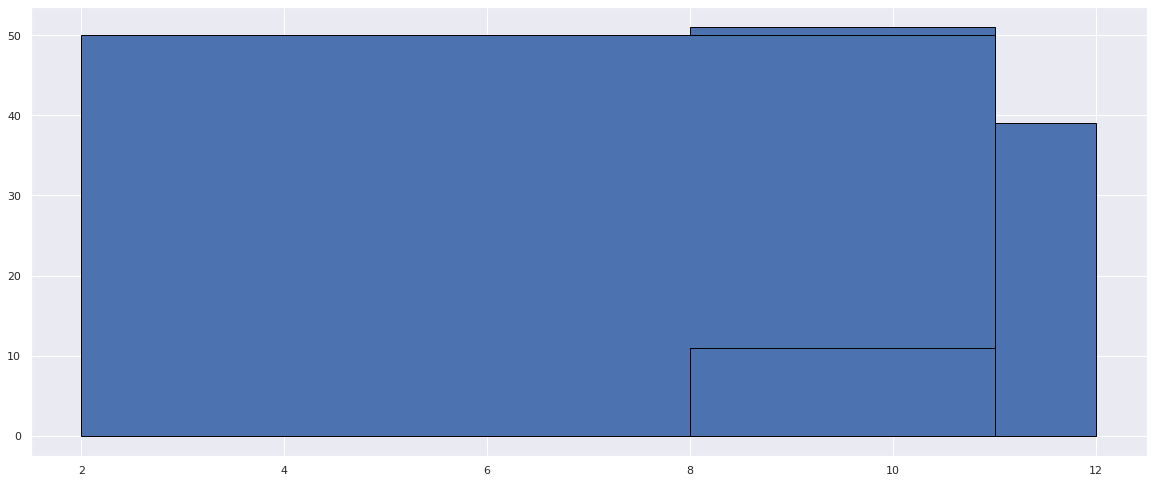

In [81]:
import matplotlib.pyplot as plt

import pandas as pd
df3 = pd.DataFrame({"begin": df["READING_START_DATE"].dt.month, "end" : df["READING_END_DATE"].dt.month, "val" : df["GROSS_CONSUMPTION"]}).head()
fig, ax = plt.subplots()
for x_1 , x_2 , x_3 in zip(df3['begin'].values ,df3['end'].values,df3['val'].values):
    ax.add_patch(plt.Rectangle((x_1,0),x_2-x_1,x_3,edgecolor="black"))
ax.autoscale()
plt.show()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

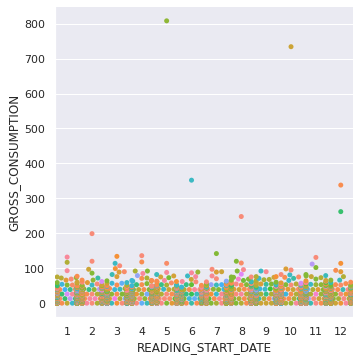

In [82]:
sns.catplot(data=df.sample(n=5000), kind="swarm", x=df["READING_START_DATE"].dt.month, y="GROSS_CONSUMPTION", hue="POSTAL_TOWN")


In [ ]:
sns.displot(data=df.head(50000), x=df["READING_START_DATE"].dt.month, col="POSTAL_TOWN", kde=True)

In [ ]:
num_df = df.select_dtypes(include=['float64','int64']).copy()
num_df.corr()


In [ ]:
sns.heatmap(num_df.corr(),annot=True)

In [ ]:
sns.pairplot(data=num_df.sample(6000))


In [ ]:
sns.barplot(x='POSTAL_TOWN',y='DAILY_AVERAGE_CONSUMPTION',data=df)

In [ ]:
sns.displot(data=df.sample(6000), x=df["DAILY_AVERAGE_CONSUMPTION"], col="CUSTOMER_TYPE", kde=True)

# Data of a single Meter


In [ ]:
df["METER_KEY"].value_counts()


In [83]:
meter_df=df[df["METER_KEY"]== 932948]
meter_df.set_index('READING_START_DATE')
meter_df

,POSTAL_TOWN,POSTCODE_OUTCODE,PROPERTY_CLASS,METER_KEY,READING_START_DATE,READING_END_DATE,READING_START_READING,READING_END_READING,GROSS_CONSUMPTION,DAILY_AVERAGE_CONSUMPTION,READING_SOURCE,CUSTOMER_TYPE,BILLPAYER_AGE,CURRENT_OCCUPANCY_AGE
1440893,Leeds,LS7,1,932948,2014-10-02,2014-05-14,352.0,360.0,8,0.085,1,0,25,1.0
1440894,Leeds,LS7,1,932948,2014-10-02,2014-05-14,352.0,360.0,8,0.085,1,0,35,1.0
1440895,Leeds,LS7,1,932948,2014-10-02,2014-05-14,352.0,360.0,8,0.085,1,0,25,1.0
1440896,Leeds,LS7,1,932948,2014-05-14,2014-07-21,360.0,366.0,6,0.087,3,0,25,1.0
1440897,Leeds,LS7,1,932948,2014-05-14,2014-07-21,360.0,366.0,6,0.087,3,0,25,1.0
1440898,Leeds,LS7,1,932948,2014-05-14,2014-07-21,360.0,366.0,6,0.087,3,0,35,1.0
1440899,Leeds,LS7,1,932948,2014-07-22,2014-07-22,366.0,366.0,0,0.000,3,0,25,0.0
1440900,Leeds,LS7,1,932948,2014-07-22,2014-07-22,366.0,366.0,0,0.000,3,0,35,0.0
1440901,Leeds,LS7,1,932948,2014-07-22,2014-07-22,366.0,366.0,0,0.000,3,0,25,0.0
1440902,Leeds,LS7,1,932948,2014-07-22,2014-03-08,366.0,366.0,0,0.000,3,0,25,0.0


In [ ]:
sns.lineplot(x="READING_START_DATE", y="GROSS_CONSUMPTION", data=meter_df)

In [ ]:
sns.lineplot(x="READING_START_DATE", y="DAILY_AVERAGE_CONSUMPTION", data=meter_df)

In [ ]:
sns.relplot(
    data=meter_df, kind="line",
    x="READING_START_DATE", y="DAILY_AVERAGE_CONSUMPTION", col="READING_SOURCE",
    facet_kws=dict(sharex=False),
)

In [ ]:
sns.heatmap(meter_df.corr())

In [ ]:
#df.to_csv('data2.csv', index=False)

In [ ]:
num_df.to_csv('num_data.csv')

# Building and fitting the Model


In [84]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [85]:
x_train, x_test, y_train, y_test = train_test_split(meter_df["READING_START_DATE"], meter_df["GROSS_CONSUMPTION"], test_size = 0.2, random_state = 100)

In [86]:
x_train.head()


1440918   2015-01-31
1440915   2015-01-31
1440899   2014-07-22
1440906   2014-04-08
1440913   2014-11-11
Name: READING_START_DATE, dtype: datetime64[ns]

In [ ]:
#x_train=np.array(x_train)
#y_train=np.array(y_train)

In [ ]:
#!pip install auto-ts
#!pip install autots
!pip install auto_ts

In [ ]:
!pip install fbprophet

In [ ]:
!pip install pystan==2.19.1.1 prophet

In [87]:
import fbprophet

In [88]:
from auto_ts import auto_timeseries

In [89]:
from fbprophet import Prophet


# model 1

In [111]:
model =auto_timeseries(forecast_period=61,
                        score_type='rmse', time_interval='D',
                        model_type='best')

In [93]:
train_df=x_train.to_frame().join(y_train)
test_df=x_test.to_frame().join(y_test)
test_df.head()

,READING_START_DATE,GROSS_CONSUMPTION
1440902,2014-07-22,0
1440916,2015-01-31,0
1440914,2015-01-31,0
1440905,2014-04-08,0
1440898,2014-05-14,6


In [94]:
train_df.set_index("READING_START_DATE", inplace=True)
test_df.set_index("READING_START_DATE", inplace=True)

In [95]:
train_df.reset_index(inplace=True)


In [96]:
train_df.head()

,READING_START_DATE,GROSS_CONSUMPTION
0,2015-01-31,4
1,2015-01-31,0
2,2014-07-22,0
3,2014-04-08,0
4,2014-11-11,6


Start of Fit.....
    Target variable given as = GROSS_CONSUMPTION
Start of loading of data.....
    Inputs: ts_column = READING_START_DATE, sep = ,, target = ['GROSS_CONSUMPTION']
    Using given input: pandas dataframe...
    READING_START_DATE column exists in given train data...
    train data shape = (21, 1)
Alert: Could not detect strf_time_format of READING_START_DATE. Provide strf_time format during "setup" for better results.
setting maxlag to a low number = 5

Running Augmented Dickey-Fuller test with paramters:
    maxlag: 5 regression: c autolag: BIC
Data is already stationary
There is no differencing needed in this datasets for VAR model
    No time series plot since verbose = 0. Continuing
Time Interval is given as D
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...
kwargs for Prophet model: {'iter': 100.0}
  Starting Prophet Fit
      No seasonality assumed since seasonality flag is set

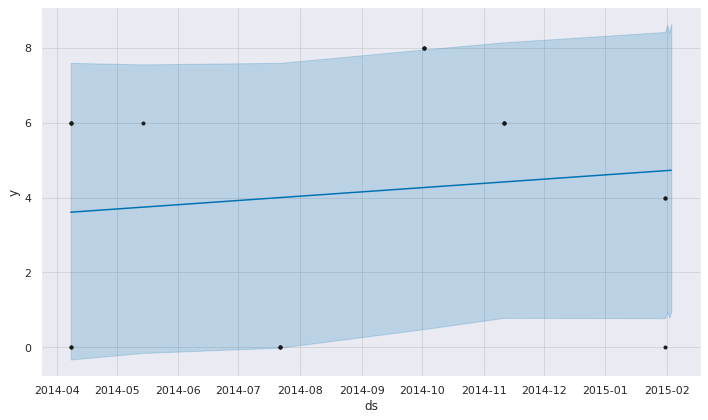

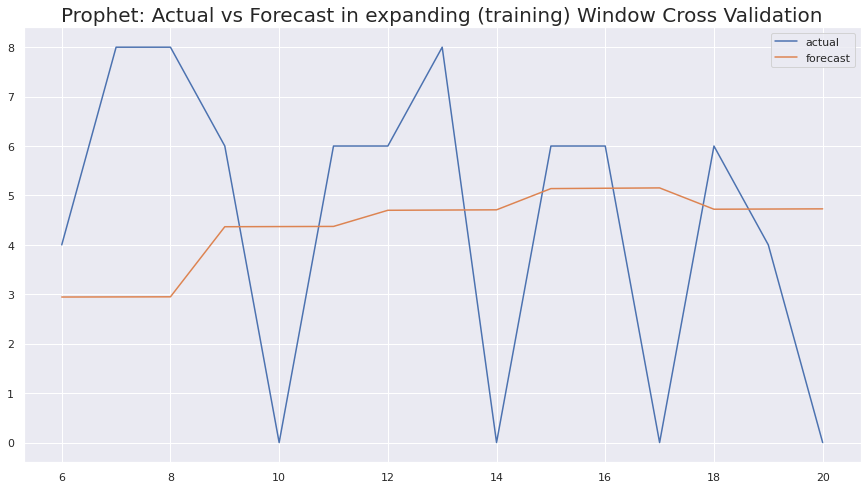

<Figure size 1080x576 with 0 Axes>

In [112]:
model.fit(traindata= train_df, 
          ts_column="READING_START_DATE",
          target="GROSS_CONSUMPTION")

In [102]:
future_predictions = model.predict(testdata=6)


Predicting using forecast period=6 as input for Prophet model
Building Forecast dataframe. Forecast Period = 6


In [103]:
test_df.reset_index(inplace=True)


In [104]:
test_df["Prophet Predictions"] = future_predictions["yhat"].values


In [105]:
test_df.head()


,index,READING_START_DATE,GROSS_CONSUMPTION,Prophet Predictions
0,0,2014-07-22,0,4.461111
1,1,2015-01-31,0,4.463952
2,2,2015-01-31,0,4.466793
3,3,2014-04-08,0,4.469634
4,4,2014-05-14,6,4.472475


# model 2

In [113]:
model2 =auto_timeseries(forecast_period=100,
                        score_type='rmse', time_interval='Q',seasonality=True,
                        model_type='ARIMA')

In [114]:
model2.fit(traindata= train_df, 
          ts_column="READING_START_DATE",
          target="GROSS_CONSUMPTION")

Start of Fit.....
    Target variable given as = GROSS_CONSUMPTION
Start of loading of data.....
    Inputs: ts_column = READING_START_DATE, sep = ,, target = ['GROSS_CONSUMPTION']
    Using given input: pandas dataframe...
    READING_START_DATE column exists in given train data...
    train data shape = (21, 1)
Alert: Could not detect strf_time_format of READING_START_DATE. Provide strf_time format during "setup" for better results.
setting maxlag to a low number = 5

Running Augmented Dickey-Fuller test with paramters:
    maxlag: 5 regression: c autolag: BIC
Results of Augmented Dickey-Fuller Test:
+-----------------------------+------------------------------+
|                             | Dickey-Fuller Augmented Test |
+-----------------------------+------------------------------+
|        Test Statistic       |     -3.7832958648553787      |
|           p-value           |     0.003082919208502574     |
|          #Lags Used         |             0.0              |
| Number of 

In [145]:
future_predictions = model.predict(testdata=6)
test_df["Prophet Predictions"] = future_predictions["yhat"].values
test_df.head()


Predicting using forecast period=6 as input for Prophet model
Building Forecast dataframe. Forecast Period = 6


,level_0,index,READING_START_DATE,GROSS_CONSUMPTION,Prophet Predictions
0,0,0,2014-07-22,0,4.461111
1,1,1,2015-01-31,0,4.463952
2,2,2,2015-01-31,0,4.466793
3,3,3,2014-04-08,0,4.469634
4,4,4,2014-05-14,6,4.472475


# data of all meters (date vs total gross consumption)

In [119]:
tot_df = df.groupby('READING_START_DATE')['GROSS_CONSUMPTION'].sum()
tot_df

READING_START_DATE
1994-04-27        0
2002-11-11     1539
2003-08-07     1482
2005-11-22     2154
2006-04-20      667
              ...  
2015-12-01    80468
2015-12-02     1328
2015-12-03      154
2015-12-05       -6
2015-12-06       -6
Name: GROSS_CONSUMPTION, Length: 966, dtype: int64

In [129]:
tot_df=tot_df.to_frame()

In [130]:
train2, test2 = train_test_split(tot_df, test_size=0.2)
print(len(train2))
print(len(test2))

772
194


In [151]:
model3 =auto_timeseries(forecast_period=100,score_type='rmse', time_interval='D',model_type='best')

Start of Fit.....
    Target variable given as = GROSS_CONSUMPTION
Start of loading of data.....
    Inputs: ts_column = READING_START_DATE, sep = ,, target = ['GROSS_CONSUMPTION']
    Using given input: pandas dataframe...
    train time series READING_START_DATE column is the index on test data...
    train data shape = (772, 1)
Alert: Could not detect strf_time_format of READING_START_DATE. Provide strf_time format during "setup" for better results.

Running Augmented Dickey-Fuller test with paramters:
    maxlag: 31 regression: c autolag: BIC
Data is already stationary
There is no differencing needed in this datasets for VAR model
    No time series plot since verbose = 0. Continuing
Time Interval is given as D
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...
kwargs for Prophet model: {'iter': 100.0}
  Starting Prophet Fit
      No seasonality assumed since seasonality flag is set to False
  Star

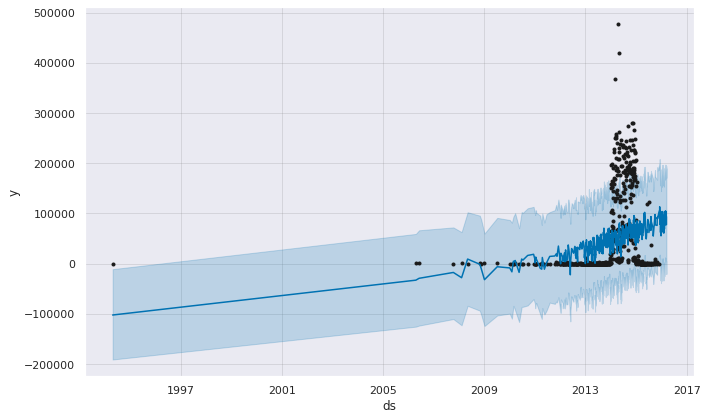

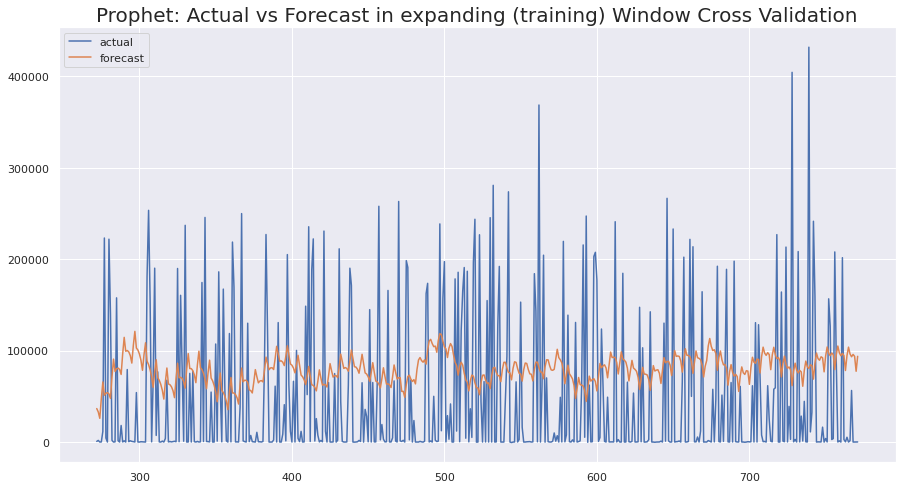

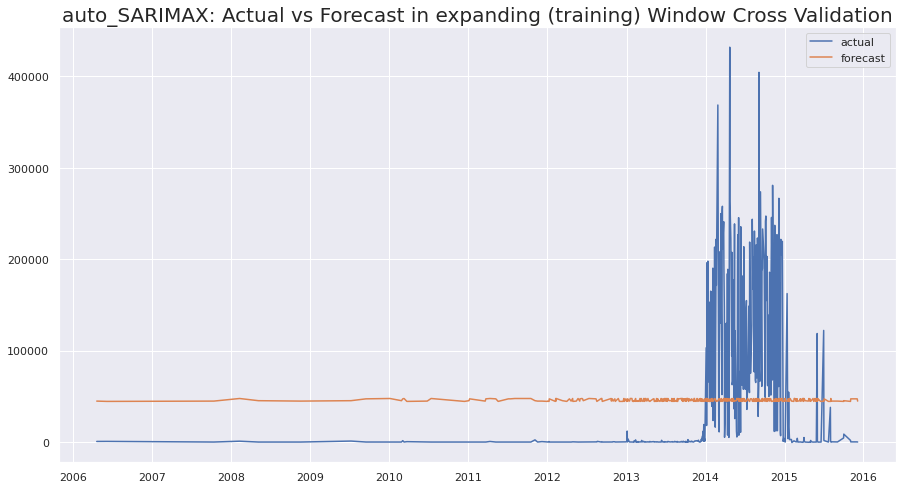

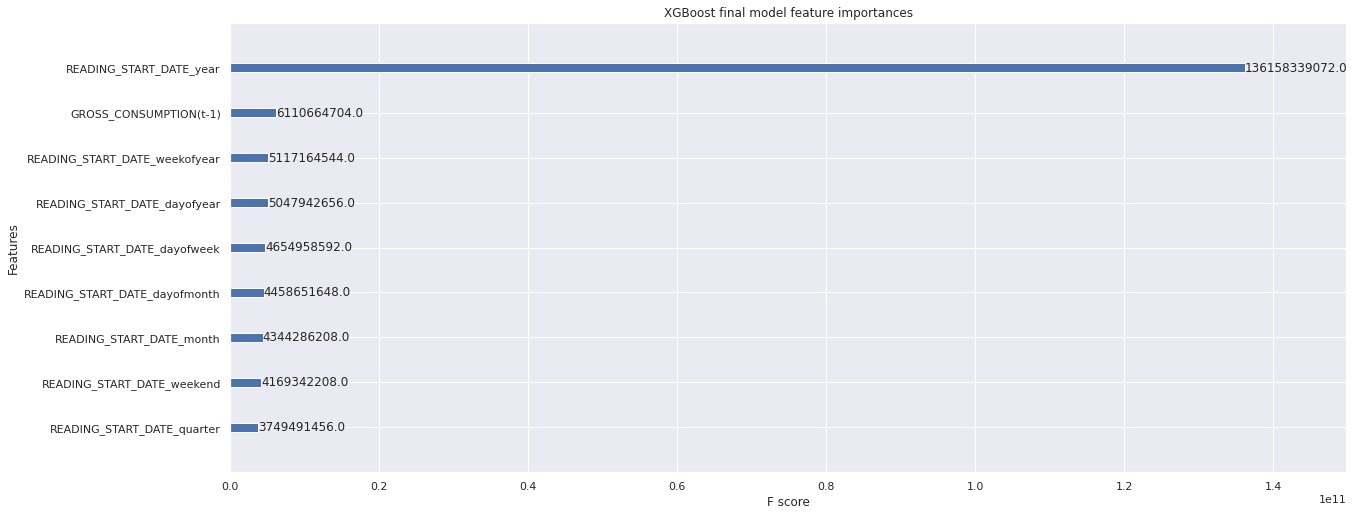

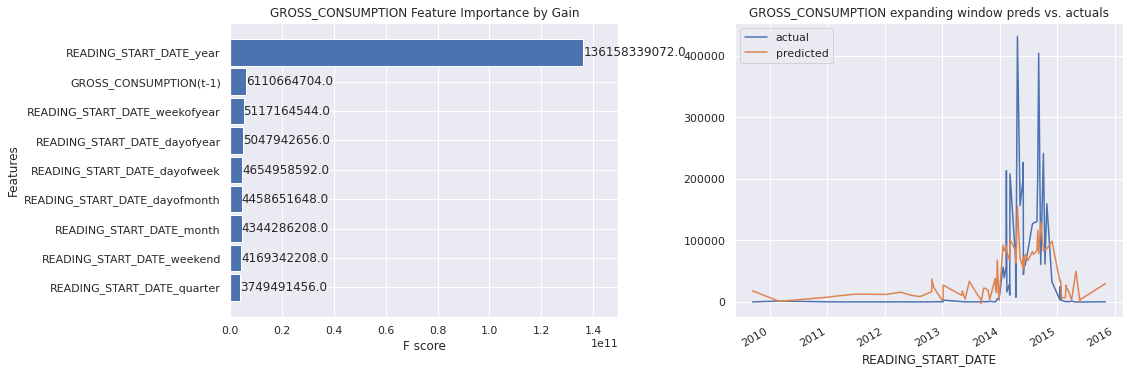

In [152]:
model3.fit(traindata= train2, 
          ts_column="READING_START_DATE",
          target="GROSS_CONSUMPTION")

In [154]:
future_predictions3 = model3.predict(testdata=61)
test2["Prophet Predictions"] = future_predictions3["yhat"].values()


Predicting using forecast period=61 as input for ML model
For large datasets: ML predictions will take time since it has to predict each row and use that for future predictions...
(Error) Testdata must be pandas dataframe for ML model. No predictions will be made.


TypeError: 'NoneType' object is not subscriptable

# model 4  

Start of Fit.....
    Target variable given as = GROSS_CONSUMPTION
Start of loading of data.....
    Inputs: ts_column = READING_START_DATE, sep = ,, target = ['GROSS_CONSUMPTION']
    Using given input: pandas dataframe...
    train time series READING_START_DATE column is the index on test data...
    train data shape = (772, 1)
Alert: Could not detect strf_time_format of READING_START_DATE. Provide strf_time format during "setup" for better results.

Running Augmented Dickey-Fuller test with paramters:
    maxlag: 31 regression: c autolag: BIC
Data is already stationary
There is no differencing needed in this datasets for VAR model
    No time series plot since verbose = 0. Continuing
Time Interval between observations has not been provided. Auto_TS will try to infer this now...
Time series input in days = 252
It is a Semi Annual time series.


Building Prophet Model



Running Facebook Prophet Model...
kwargs for Prophet model: {'iter': 100.0}
  Starting Prophet Fit
      No season

TypeError: 'numpy.ndarray' object is not callable

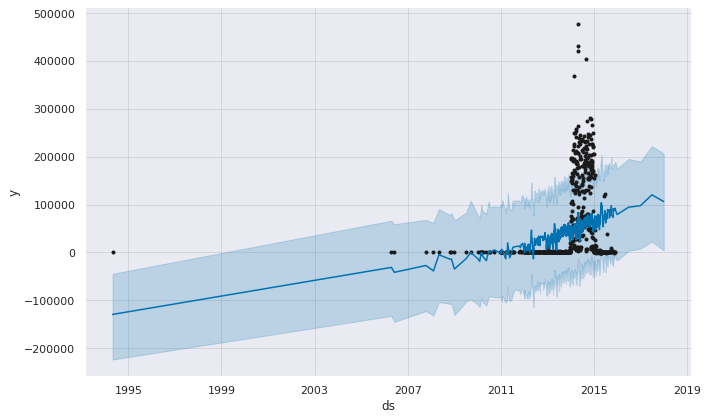

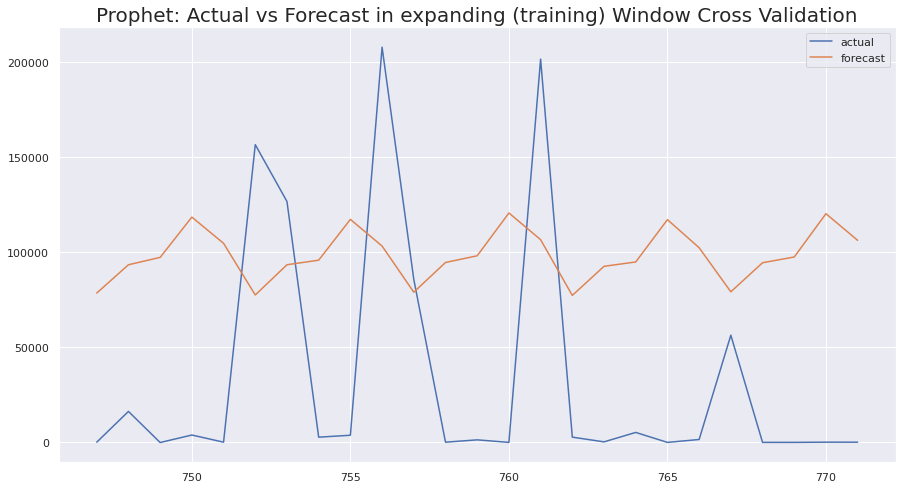

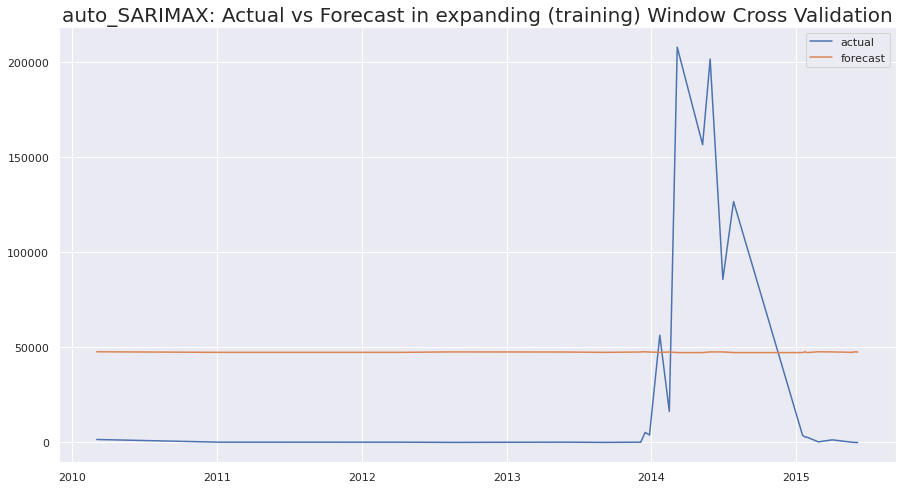

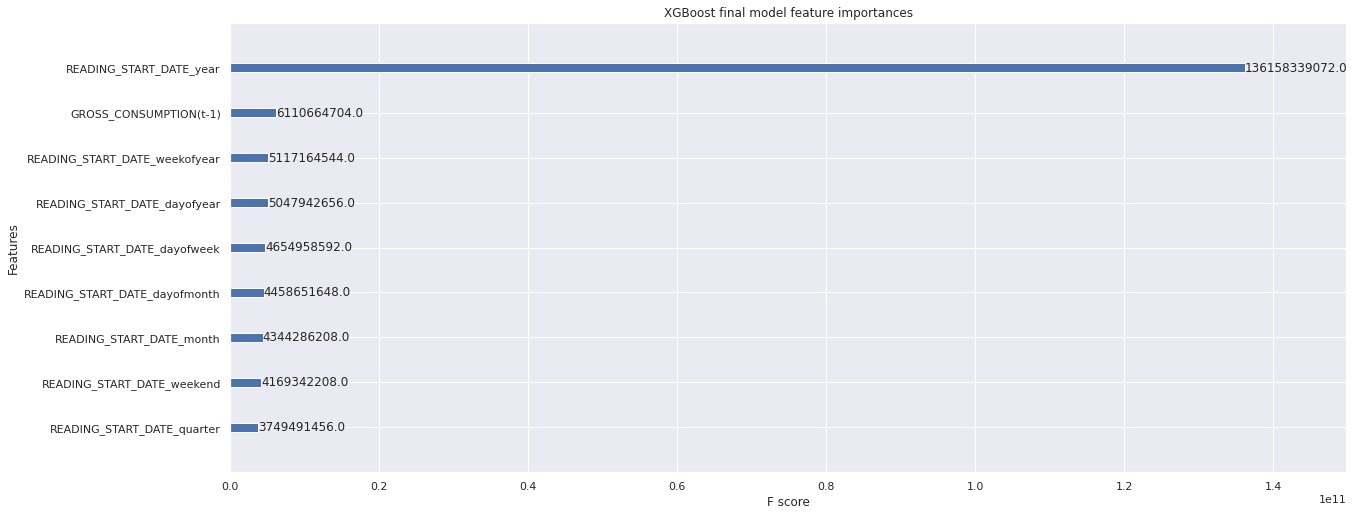

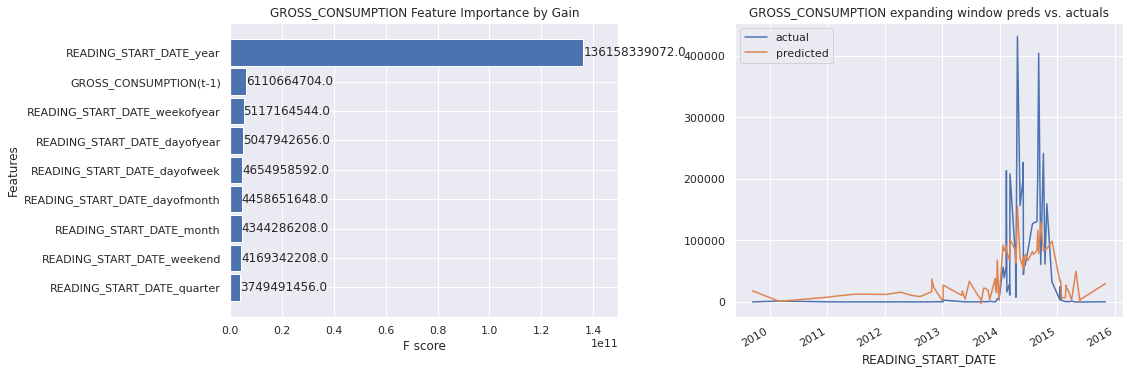

In [155]:
model4 =auto_timeseries(score_type='rmse',model_type='best')
model4.fit(traindata= train2, 
          ts_column="READING_START_DATE",
          target="GROSS_CONSUMPTION")
future_predictions4 = model4.predict(testdata=61)
test2["Prophet Predictions"] = future_predictions4["yhat"].values()


# forecasting daily average consumption


In [196]:
train5, test5 = train_test_split(tot_df, test_size=0.2)
print(len(train5))
print(len(test5))

772
194


Start of Fit.....
    Target variable given as = DAILY_AVERAGE_CONSUMPTION
Start of loading of data.....
    Inputs: ts_column = READING_START_DATE, sep = ,, target = ['DAILY_AVERAGE_CONSUMPTION']
    Using given input: pandas dataframe...
    train time series READING_START_DATE column is the index on test data...
    train data shape = (772, 1)
Alert: Could not detect strf_time_format of READING_START_DATE. Provide strf_time format during "setup" for better results.

Running Augmented Dickey-Fuller test with paramters:
    maxlag: 31 regression: c autolag: BIC
Data is already stationary
There is no differencing needed in this datasets for VAR model
    No time series plot since verbose = 0. Continuing
Time Interval between observations has not been provided. Auto_TS will try to infer this now...
Time series input in days = 143
It is a Quarterly time series.


Building Prophet Model



Running Facebook Prophet Model...
kwargs for Prophet model: {'iter': 100.0}
  Starting Prophet Fit
 

TypeError: 'numpy.ndarray' object is not callable

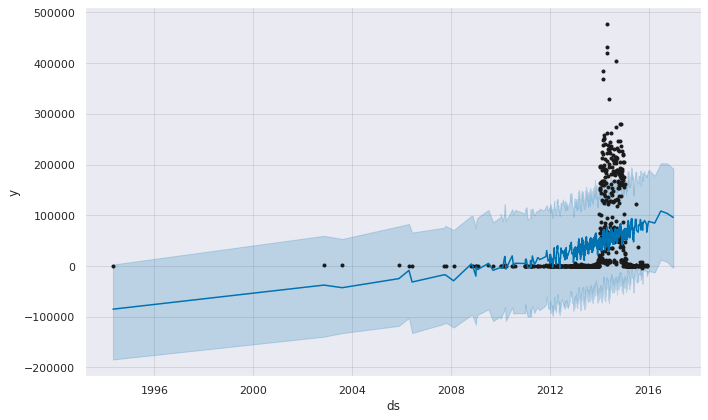

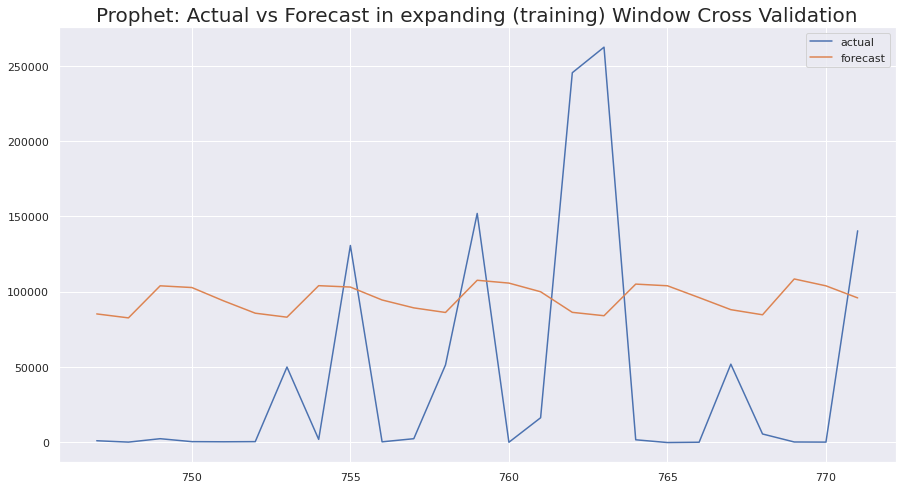

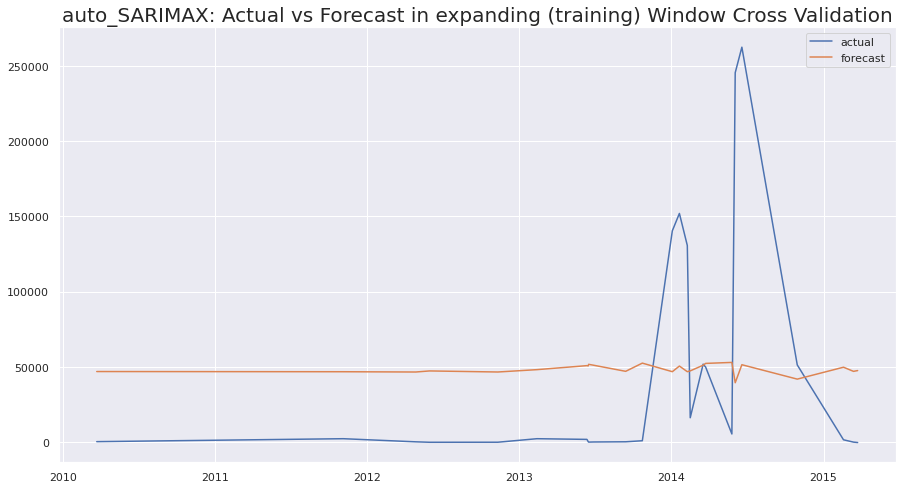

In [197]:
model5 =auto_timeseries(score_type='rmse',model_type='best')
model5.fit(traindata= train5, 
          ts_column="READING_START_DATE",
          target="DAILY_AVERAGE_CONSUMPTION")
future_predictions5 = model5.predict(testdata=61)
test5["Prophet Predictions"] = future_predictions5["yhat"].values()